<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
#! pip install plotly

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import GridSearchCV

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [3]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [4]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [6]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [7]:
# Filter Data to Most Recent Year
df.describe()
# Most recent year is 2007

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000
mean,1979.50000,59.47444,29601212.32453,7215.32708,425.88028
std,17.26533,12.91711,106157896.74391,9857.45454,248.30571
min,1952.00000,23.59900,60011.00000,241.16588,4.00000
25%,1965.75000,48.19800,2793664.00000,1202.06031,208.00000
50%,1979.50000,60.71250,7023595.50000,3531.84699,410.00000
75%,1993.25000,70.84550,19585221.75000,9325.46235,638.00000
max,2007.00000,82.60300,1318683096.00000,113523.13290,894.00000


In [8]:
df = df[df['year'] == 2007]

In [9]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.82800,31889923,974.58034,AFG,4
23,Albania,Europe,2007,76.42300,3600523,5937.02953,ALB,8
35,Algeria,Africa,2007,72.30100,33333216,6223.36747,DZA,12
47,Angola,Africa,2007,42.73100,12420476,4797.23127,AGO,24
59,Argentina,Americas,2007,75.32000,40301927,12779.37964,ARG,32


In [10]:
# Set Country to Index
df.set_index('country', inplace=True)

In [11]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns=['iso_alpha', 'year', 'iso_num'], inplace=True)

In [12]:
# How many countries in each continent?
df.groupby('continent').count()

# There are 5 continents.
# Number of countries in each continent is down below.

,lifeExp,pop,gdpPercap
continent,,,
Africa,52,52,52
Americas,25,25,25
Asia,33,33,33
Europe,30,30,30
Oceania,2,2,2


In [13]:
df

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964
...,...,...,...,...
Vietnam,Asia,74.24900,85262356,2441.57640
West Bank and Gaza,Asia,73.42200,4018332,3025.34980
"Yemen, Rep.",Asia,62.69800,22211743,2280.76991


In [14]:
# Get dummies!
df = pd.get_dummies(df)

In [15]:
# Head (again!)
df.head()


,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,0,1,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0
Angola,42.73100,12420476,4797.23127,1,0,0,0,0
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0


In [16]:
# Define X
X = df.copy()

In [17]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

In [18]:
# Elbow Plot
warnings.filterwarnings('ignore')

inertia_list = []

for k in range(1, 21):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_sc)
    inertia_list.append(km.inertia_)
    
warnings.resetwarnings()

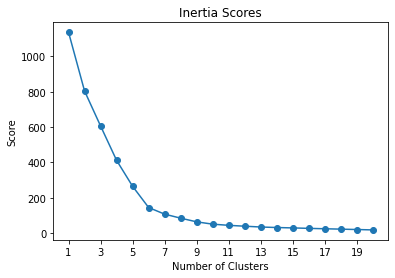

In [19]:
# Plot Elbow
plt.plot(range(1, 21), inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores')
plt.xticks(range(1, 21, 2));

## From the result, 6 clusters would be the opimal point.

In [20]:
# Silhouette Score
warnings.filterwarnings('ignore')
silhouette_list = []

for k in range(2, 21):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_sc)
    silhouette_list.append(silhouette_score(X_sc, km.labels_))
warnings.resetwarnings()

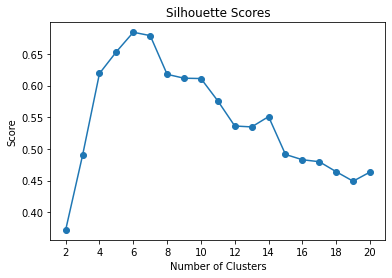

In [21]:
# Plot Elbow
plt.plot(range(2, 21), silhouette_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores')
plt.xticks(range(2, 21, 2));

## From the chart result, 6 clusters would be the optimal k
## for this dataset.

#### Based off of our metrics above, which k should we try first?

Answer Here:
k=6 is what we should try eviden from both Inertia and Silhouette scores.


In [22]:
# Now let's try it!

# Instantiate & Fit
km = KMeans(n_clusters=6, random_state=42)
km.fit(X_sc)

C:\Users\Chalermchon Wongsopa\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [23]:
# Silhouette Score
silhouette_score(X_sc, km.labels_)

0.684136286873593

#### Visualize Your Clusters!

In [24]:
# Add cluster column
df['cluster'] = km.labels_
df.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0,3
Albania,76.42300,3600523,5937.02953,0,0,0,1,0,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0,1
Angola,42.73100,12420476,4797.23127,1,0,0,0,0,1
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0,2


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


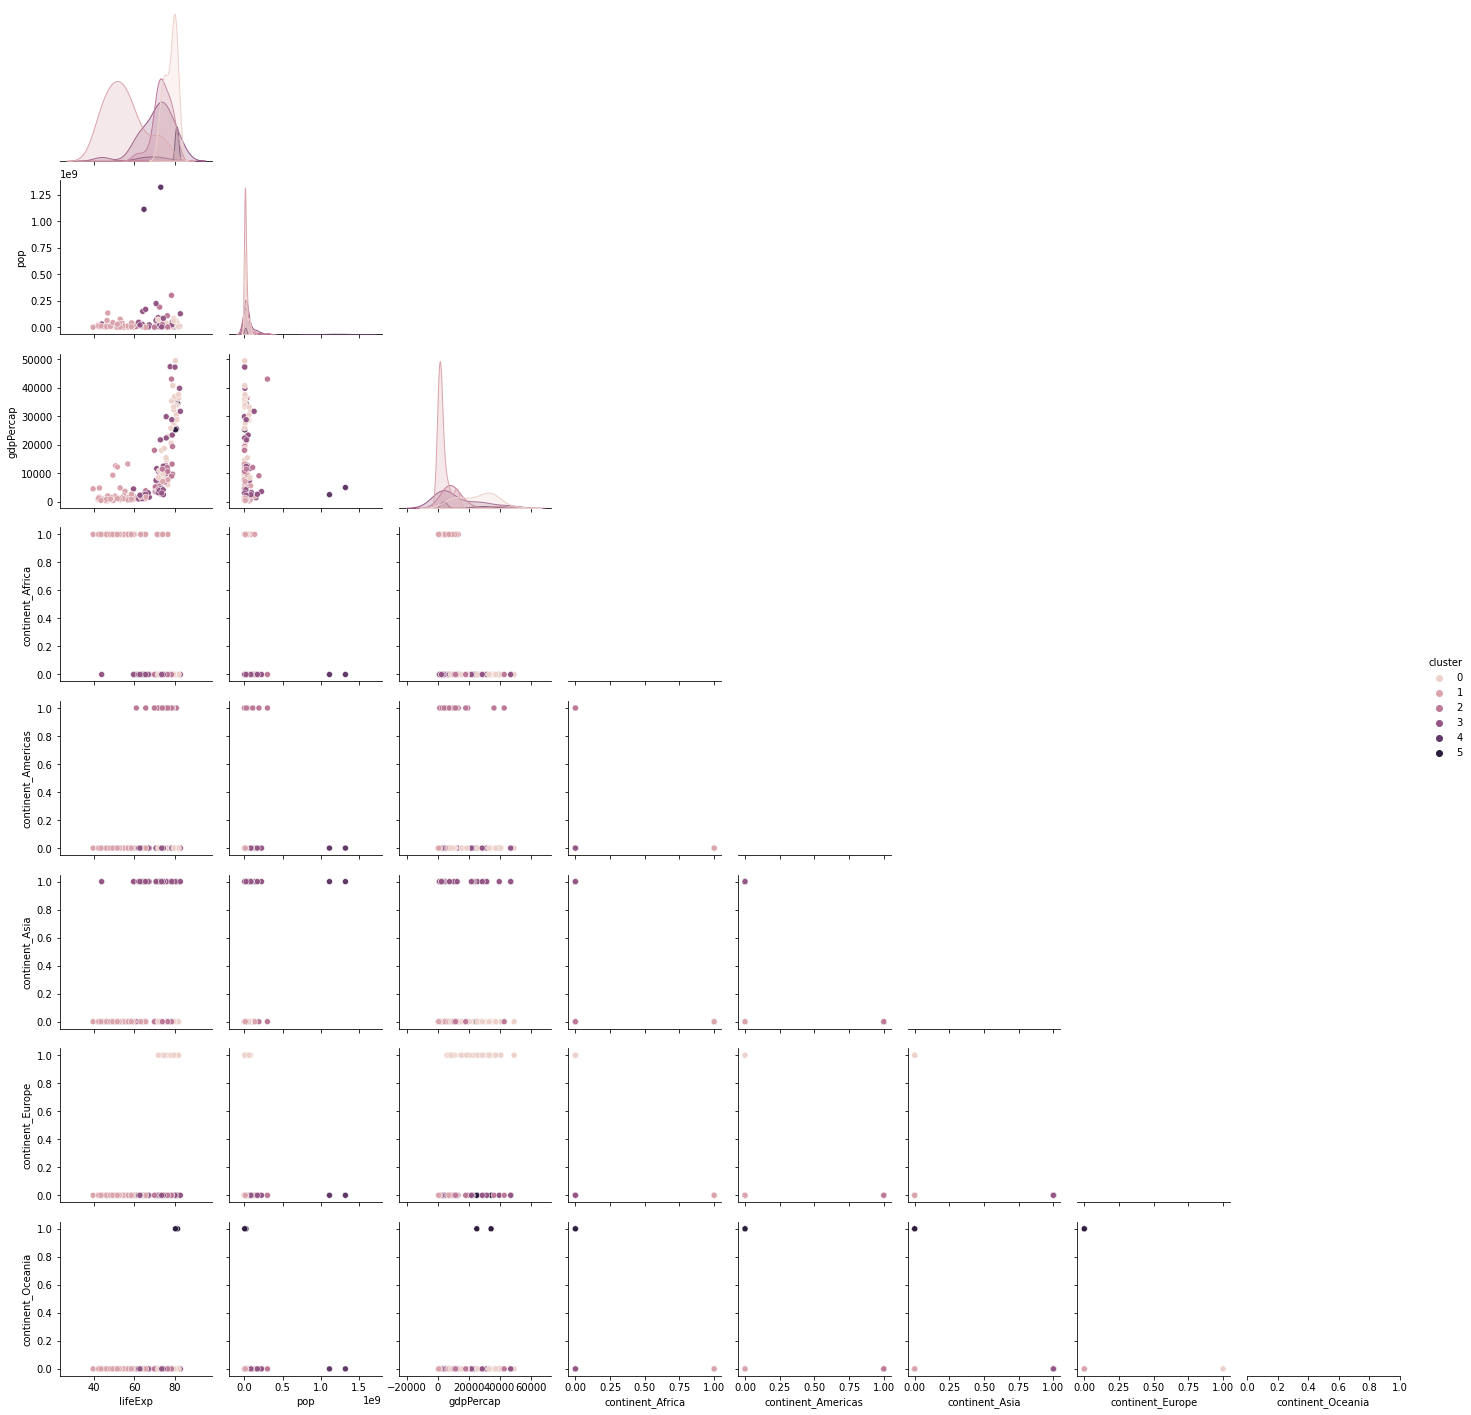

In [25]:
# Method 1: Pairplots/Scatterplots

sns.pairplot(df, hue='cluster', corner=True);

## There are no information or they are very complicated to see via visualization.

In [26]:
# Method 2: Groupby
# Numeric variables
df.groupby('cluster')[['lifeExp', 'pop', 'gdpPercap']].mean()

,lifeExp,pop,gdpPercap
cluster,,,
0,77.64860,19536617.63333,25054.48164
1,54.80604,17875763.30769,3089.03260
2,73.60812,35954847.36000,11003.03163
3,70.85100,44608851.61290,13038.66327
4,68.82950,1214539713.50000,3705.66263
5,80.71950,12274973.50000,29810.18827


In [27]:
df.columns

Index(['lifeExp', 'pop', 'gdpPercap', 'continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania', 'cluster'],
      dtype='object')

In [28]:
# Dummy variables
df.groupby('cluster')[['continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania']].sum()

# The cluster seems perform well in terms of distinguish countries by their continent.
# But cluster number '4' is a little bit strange because only 2 countries from Asia continent
# are contained inside.

,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
cluster,,,,,
0,0,0,0,30,0
1,52,0,0,0,0
2,0,25,0,0,0
3,0,0,31,0,0
4,0,0,2,0,0
5,0,0,0,0,2


#### An Even Closer Look...Which countries are in each of these clusters?

In [29]:
# For loop
for i in range(df['cluster'].nunique()):
    print(f'Cluster: {i}')
    print(df[df['cluster'] == i].index, end='\n')

Cluster: 0
Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')
Cluster: 1
Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Reunion', 'Rwanda',
  

In [30]:
## As per result, cluster 0, 1, 2, 3, and 5 would be clustered by their continent.
# Cluster '4' might be clustered by their number of population.

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

#### Try tuning your parameters

In [31]:
# Hyperparameters
    # eps=0.5,
    # min_samples=5,
    # metric='euclidean',
    # metric_params=None,
    # algorithm='auto',
    # leaf_size=30,
    # p=None,
    # n_jobs=None

In [32]:
# Define function to fit DBSCAN and return silhouette scores
def dbscan_gs(data, eps=0.5, min_samples=5, metric='euclidean'):
    """Function that fit DBSCAN model and return silhouette scores
    
    Parameter:
    eps: default=0.5
    min_samples: default=5
    metric: default='euclidean'
    """
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(data)
    return silhouette_score(data, db.labels_)

In [33]:
# Create hyperparameters dict for gridsearch
dbscan_param = {
    'eps': [0.5, 0.7, 0.9, 1.2, 1.5, 3, 5, 7],
    'min_samples': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

# Create a dataframe to store results
result_df = pd.DataFrame(columns=['eps', 'min_samples', 'metric', 'score'])

# loop through each params
counter = 0
for eps in dbscan_param['eps']:
    for min_sam in dbscan_param['min_samples']:
        for metric in dbscan_param['metric']:
            result_df.loc[counter] = [eps, min_sam, metric,
                                       dbscan_gs(X_sc, eps, min_sam, metric)
            ]
            counter += 1
    

In [34]:
# Show result df
result_df

,eps,min_samples,metric,score
0,0.50000,3,euclidean,0.42168
1,0.50000,3,manhattan,0.30249
2,0.50000,5,euclidean,0.45586
3,0.50000,5,manhattan,0.25718
4,0.50000,7,euclidean,0.40296
...,...,...,...,...
75,7.00000,7,manhattan,0.62911
76,7.00000,9,euclidean,0.62911
77,7.00000,9,manhattan,0.62911
78,7.00000,11,euclidean,0.62911


#### Determine your best silhouette score

In [35]:
# Get max score's parameters
result_df[result_df['score'] == result_df['score'].max()]

## eps=3, min_samples=3, metric='euclidean' would give the maxmimum score
## over given parameters

,eps,min_samples,metric,score
50,3.00000,3,euclidean,0.65969
51,3.00000,3,manhattan,0.65969
52,3.00000,5,euclidean,0.65969
53,3.00000,5,manhattan,0.65969
54,3.00000,7,euclidean,0.65969
55,3.00000,7,manhattan,0.65969
56,3.00000,9,euclidean,0.65969
57,3.00000,9,manhattan,0.65969
58,3.00000,11,euclidean,0.65969
59,3.00000,11,manhattan,0.65969


In [36]:
# Fit model for best parameters
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(X_sc)
silhouette_score(X_sc, dbscan.labels_).round(2)

0.66

In [37]:
# Check clusters' result
pd.Series(dbscan.labels_).value_counts().sort_index()

# There are 4 clusters created by DBSCAN.
# 4 datapoints are considered as outlier.

-1     4
 0    31
 1    30
 2    52
 3    25
dtype: int64

#### Visualize your clusters

In [38]:
df['cluster_dbscan'] = dbscan.labels_

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


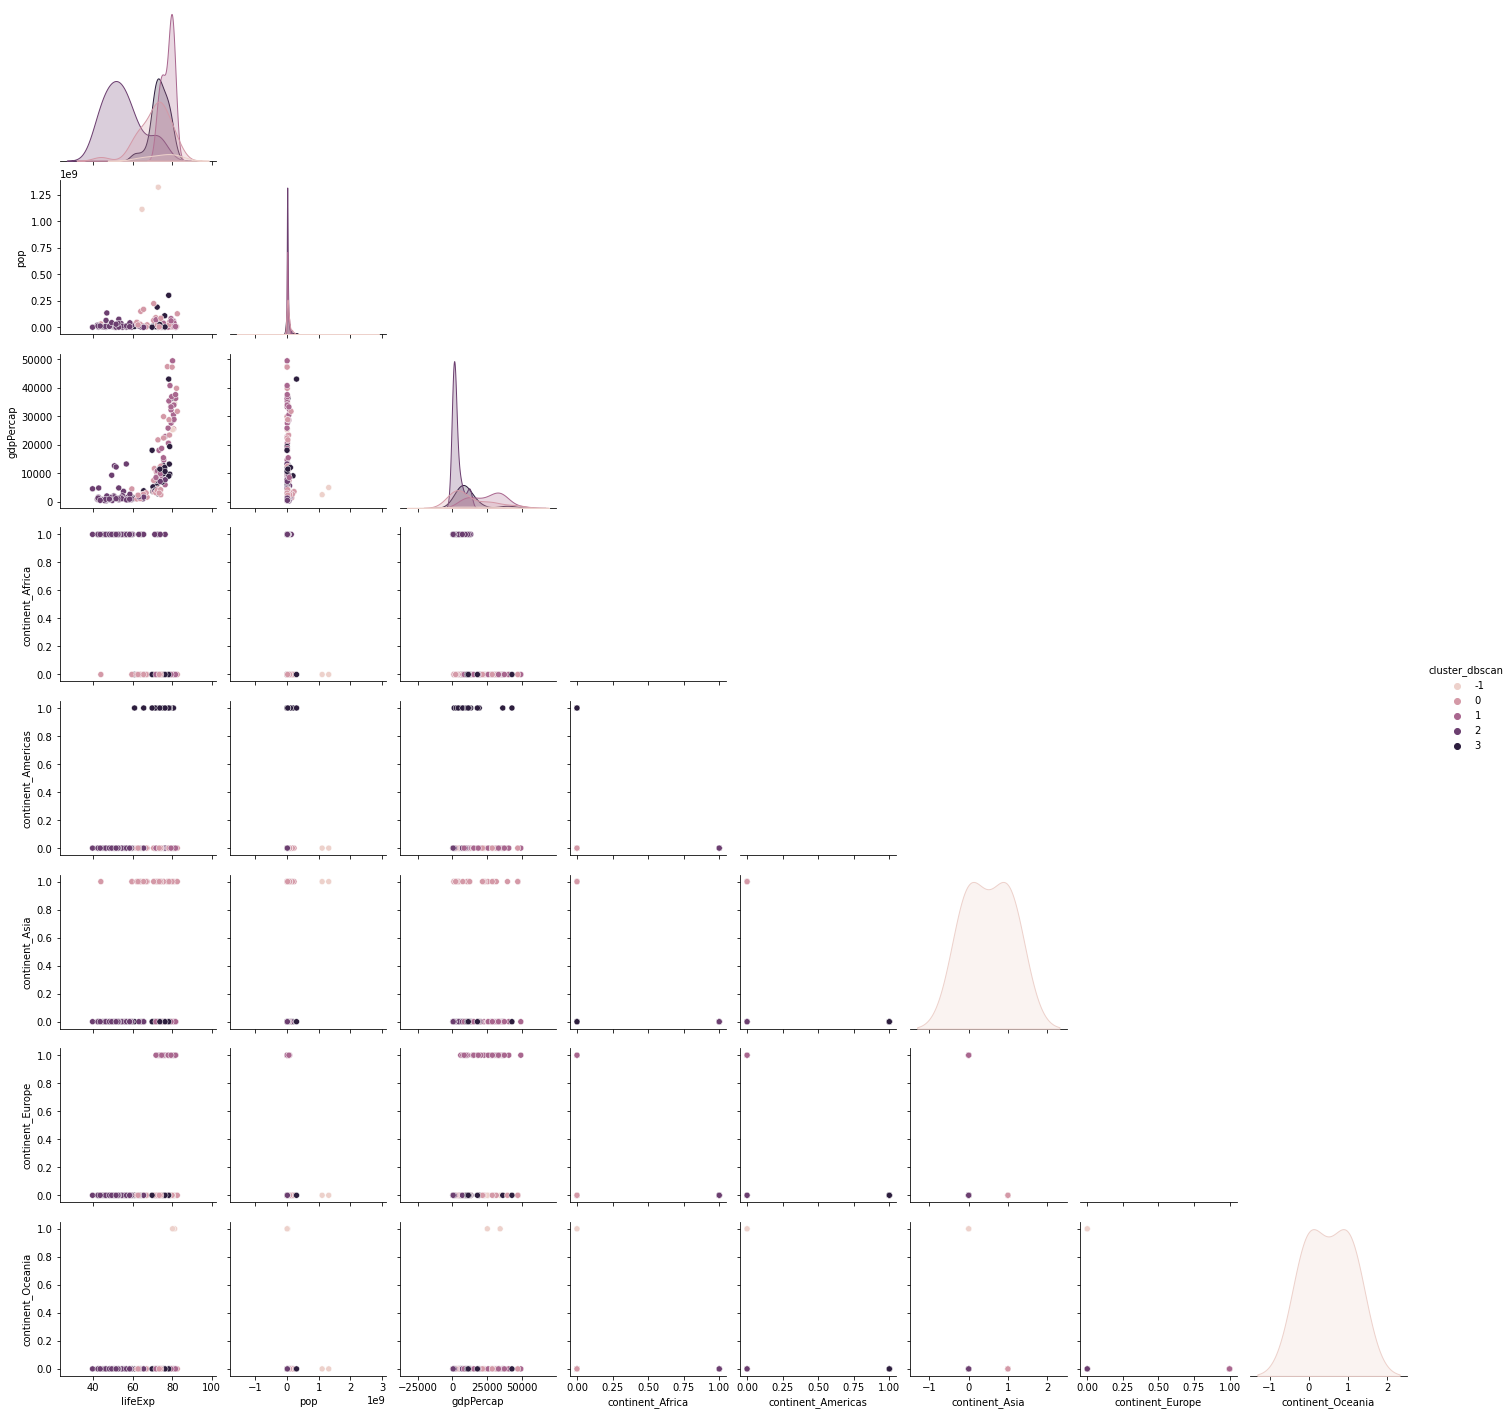

In [39]:
sns.pairplot(df.drop(columns='cluster'), hue='cluster_dbscan', corner=True);


In [40]:
# Determine your best silhouette score
# Is this better or worse than KMeans?
# Which countries are in each cluster?

#### Is this better or worse than KMeans?

In [41]:
print('Comparing Silhouette Scores')
print(f'KMeans: {silhouette_score(X_sc, km.labels_).round(2)}')
print(f'DBSCAN: {silhouette_score(X_sc, dbscan.labels_).round(2)}')

# The opimal model for this dataset would be KMeans comparing silhouette scores.

Comparing Silhouette Scores
KMeans: 0.68
DBSCAN: 0.66


#### Which countries are in each cluster?

In [42]:
# For loop
for i in range(df['cluster_dbscan'].nunique()):
    print(f'Cluster: {i - 1}')
    print(df[df['cluster_dbscan'] == i - 1].index, end='\n')

Cluster: -1
Index(['Australia', 'China', 'India', 'New Zealand'], dtype='object', name='country')
Cluster: 0
Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.'],
      dtype='object', name='country')
Cluster: 1
Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],


### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 